# Simulations

In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from frites import set_mpl_style

from itpg.hoi.connectivity import conn_hoi

set_mpl_style()

## Useful functions

In [6]:
def generate_data(n_trials=300, n_roi=6, n_times=600):
    # generate the data
    x = np.random.rand(n_trials, n_roi, n_times)
    roi = np.array([f"r{r}" for r in range(n_roi)])
    trials = np.random.rand(n_trials)
    times = np.arange(n_times)
    

    return x, trials, times, roi


In [3]:

def plot_oinfo(oinfo, relationships, roi):
  # print(oinfo)
  vmin, vmax = np.nanpercentile(oinfo.data, [1, 99])
  minmax = max(abs(vmin), abs(vmax))
  vmin, vmax = -minmax, minmax

  # plot the results
  df = oinfo.to_pandas()
  plt.pcolormesh(
      df.columns, df.index, df.values, cmap='RdBu_r', vmin=vmin, vmax=vmax
  )
  plt.colorbar()
  plt.xlabel('Times')
  plt.axvline(0., color='k')

  rel = ['-'.join(roi[list(r)]) for r in relationships]
  # syn = ['-'.join(roi[list(r)]) for r in synergy]
  for n_k, k in enumerate(oinfo['roi'].data):
      if k.replace('-beh', '') in rel:
          plt.gca().get_yticklabels()[n_k].set_color('red')
      # if k.replace('-beh', '') in syn:
      #     plt.gca().get_yticklabels()[n_k].set_color('blue')

  plt.show()

## Simulations: without behaviour

In [4]:
def set_lin_relationship(x, relationships, alpha=0.6):
  # last item is the dependent var
  for r in relationships:
    vars, sl = r
    vars = [int(v) for v in vars.split(',') if v.isnumeric()]
    win = np.hanning(sl.stop-sl.start).reshape(1, -1)
    win = alpha*win
    x[:, vars[-1], sl] += np.sum(x[:, vars[:-1], sl], axis=1)*win         
  
  return x


#### Linear relationship: Pure synergy

Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
    Sorting roi names
Compute the  HOI (min=3; max=5)
    Copnorm the data
    Multiplets of size 3
    Multiplets of size 4
    Multiplets of size 5


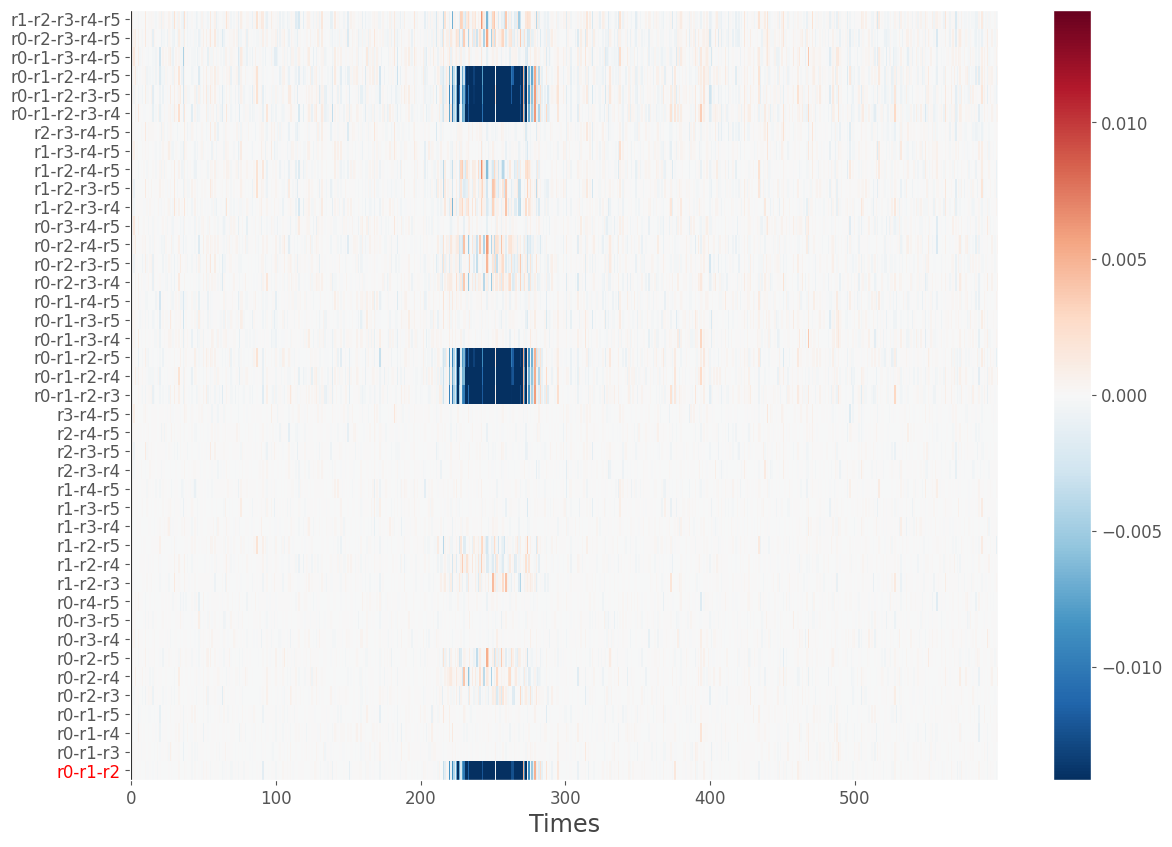

In [7]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1,2", slice(200,300)),    
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_lin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars, roi)



#### Linear relationship: Pure redundancy

Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
INFO:frites:Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
    Sorting roi names
INFO:frites:    Sorting roi names
Compute the  HOI (min=3; max=5)
INFO:frites:Compute the  HOI (min=3; max=5)
    Copnorm the data
INFO:frites:    Copnorm the data
    Multiplets of size 3
INFO:frites:    Multiplets of size 3
    Multiplets of size 4
INFO:frites:    Multiplets of size 4
    Multiplets of size 5
INFO:frites:    Multiplets of size 5


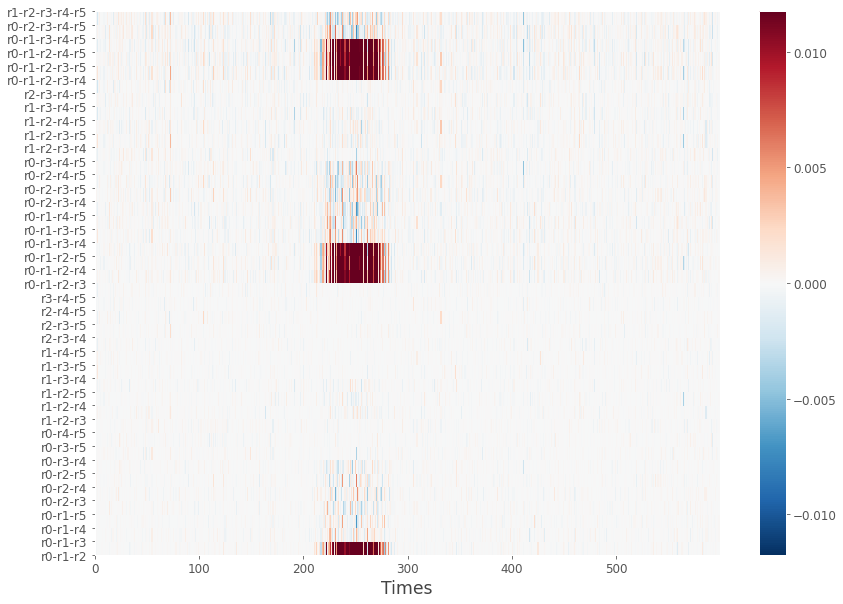

In [36]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1", slice(200,300)),
    ("0,2", slice(200,300)),    
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_lin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars)


In [ ]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1", slice(200,300)),
    ("0,2", slice(200,300)),    
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_lin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars)

#### Linear relationship: Synergy + Redundancy

Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
INFO:frites:Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
    Sorting roi names
INFO:frites:    Sorting roi names
Compute the  HOI (min=3; max=5)
INFO:frites:Compute the  HOI (min=3; max=5)
    Copnorm the data
INFO:frites:    Copnorm the data
    Multiplets of size 3
INFO:frites:    Multiplets of size 3
    Multiplets of size 4
INFO:frites:    Multiplets of size 4
    Multiplets of size 5
INFO:frites:    Multiplets of size 5


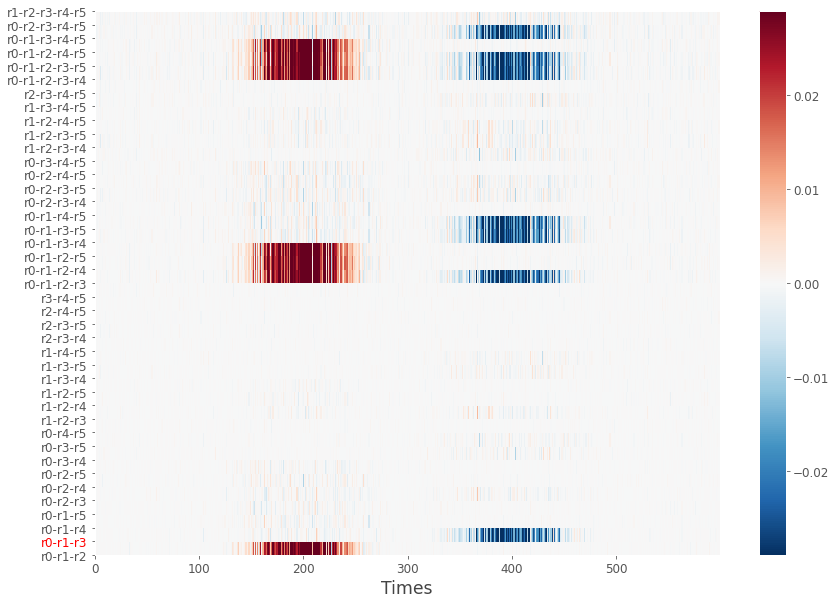

In [51]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1", slice(100,300)),
    ("0,2", slice(100,300)),
    ("0,1,3", slice(300,500)),
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_lin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars)


Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
INFO:frites:Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
    Sorting roi names
INFO:frites:    Sorting roi names
Compute the  HOI (min=3; max=5)
INFO:frites:Compute the  HOI (min=3; max=5)
    Copnorm the data
INFO:frites:    Copnorm the data
    Multiplets of size 3
INFO:frites:    Multiplets of size 3
    Multiplets of size 4
INFO:frites:    Multiplets of size 4
    Multiplets of size 5
INFO:frites:    Multiplets of size 5


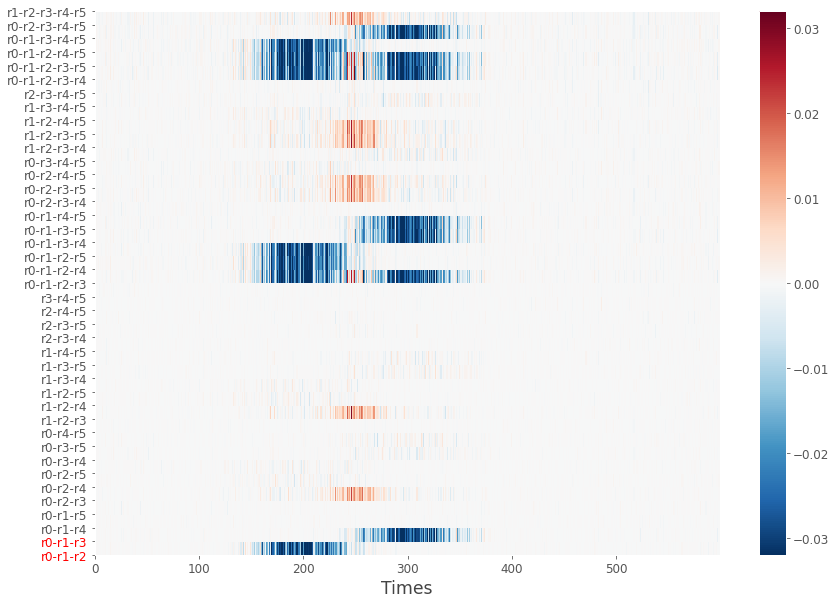

In [ ]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1,2", slice(100,300)),
    ("0,1,3", slice(200,400)),
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_lin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars)


#### Linear relationship: Gradual O-Info

Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
INFO:frites:Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
    Sorting roi names
INFO:frites:    Sorting roi names
Compute the  HOI (min=3; max=5)
INFO:frites:Compute the  HOI (min=3; max=5)
    Copnorm the data
INFO:frites:    Copnorm the data
    Multiplets of size 3
INFO:frites:    Multiplets of size 3
    Multiplets of size 4
INFO:frites:    Multiplets of size 4
    Multiplets of size 5
INFO:frites:    Multiplets of size 5


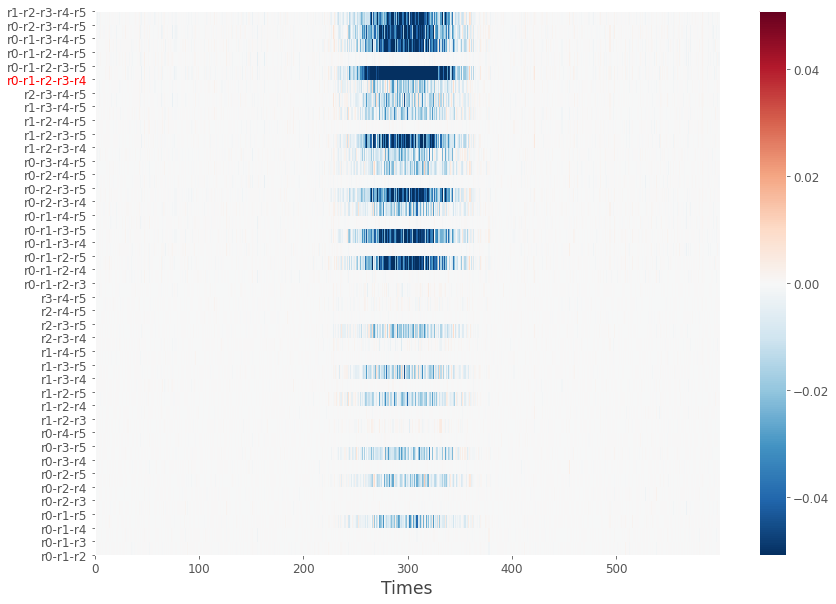

In [37]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1,2,3,4", slice(200,400)),    
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_lin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars)

#### Simulations: non-linear relationship

In [43]:
# same function but using non-linear relationship
def set_nonlin_relationship(x, relationships, alpha=0.6):
  # last item is the dependent var
  for r in relationships:
    vars, sl = r
    vars = [int(v) for v in vars.split(',') if v.isnumeric()]
    win = np.hanning(sl.stop-sl.start).reshape(1, -1)
    win = alpha*win
    x[:, vars[-1], sl] += np.sum(np.square(x[:, vars[:-1], sl]), axis=1)*win         
  
  return x

Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
INFO:frites:Defining links (n_roi=6; directed=False; net=False, nb_min_links=None)
    Sorting roi names
INFO:frites:    Sorting roi names
Compute the  HOI (min=3; max=5)
INFO:frites:Compute the  HOI (min=3; max=5)
    Copnorm the data
INFO:frites:    Copnorm the data
    Multiplets of size 3
INFO:frites:    Multiplets of size 3
    Multiplets of size 4
INFO:frites:    Multiplets of size 4
    Multiplets of size 5
INFO:frites:    Multiplets of size 5


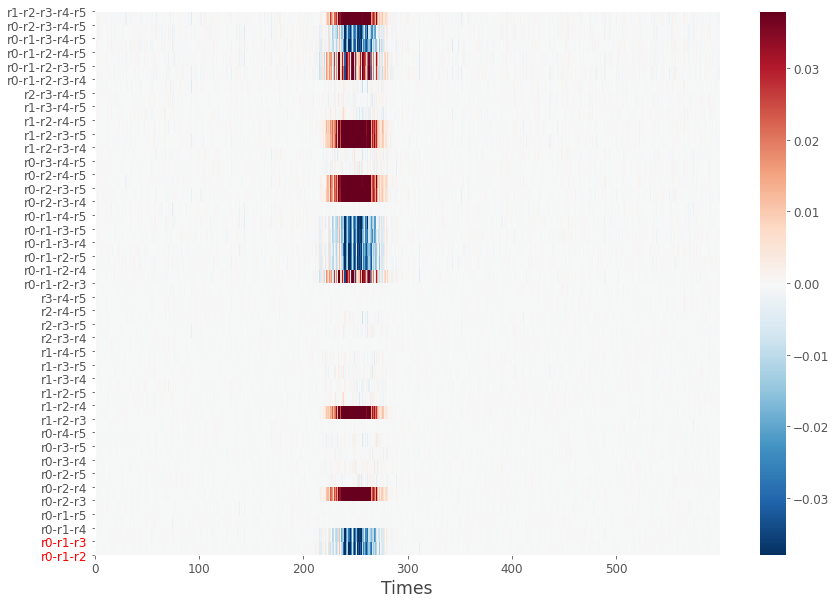

In [44]:
n_trials = 300
n_roi = 6
n_times = 600
# win amplitude
alpha = 0.6 

# the last item is the dependent var
# ex: (0,1,2) => X_2 = X_0 + X_1
relationships = [
    ("0,1,2", slice(200,300)),
    ("0,1,3", slice(200,300)),    
]

# generate and setup data
x,trials,times, roi = generate_data(n_trials, n_roi, n_times)
x = set_nonlin_relationship(x, relationships, alpha)
    
x = xr.DataArray(x, dims=('trials', 'roi', 'times'),
                     coords=(trials, roi, times))

# compute o-info
oinfo = conn_hoi(x, minsize=3, maxsize=5, y=None, roi='roi',
                  times='times')

# plot
vars = list()
for j,r in enumerate(relationships):
  vars_str, t_window = r
  vars.append([int(v) for v in vars_str.split(',') if v.isnumeric()])

plot_oinfo(oinfo, vars)
